In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-traffic-advection)


 In the following definition we allow the velocity $c$ to be specified as a parameter in the `ODEProblem`.

In [2]:
x, Dₓ, Dₓₓ = FNC.diffper(300, [-4, 4])
f = (u, c, t) -> -c * (Dₓ*u);

The following initial condition isn't mathematically periodic, but the deviation is less than machine precision. We specify RK4 as the solver.

In [3]:
using OrdinaryDiffEq
u_init = @. 1 + exp( -3x^2 )
IVP = ODEProblem(f, u_init, (0., 4.), 2)
sol = solve(IVP, RK4());

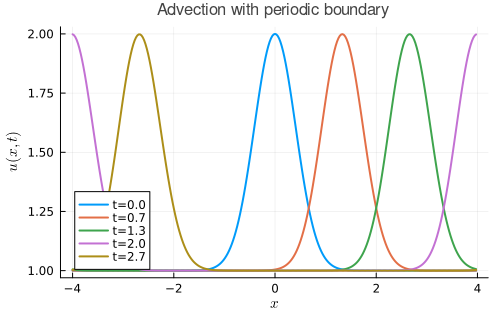

In [4]:
using Plots
plt = plot(
    legend=:bottomleft,
    title="Advection with periodic boundary",
    xaxis=(L"x"),  yaxis=(L"u(x,t)"))
for t in (0:4) * 2/3
    plot!(x, sol(t), label=@sprintf("t=%.1f", t))
end
plt

An animation shows the solution nicely. The bump moves with speed 2 to the right, reentering on the left as it exits to the right because of the periodic conditions.

In [5]:
anim = @animate for t in range(0, 4, 120) 
    plot(x, sol(t),
        title=@sprintf("Advection equation, t = %.2f", t),
        xaxis=(L"x"),  yaxis=([1, 2], L"u(x,t)"),
        dpi=150)
end
mp4(anim, "advection.mp4")

[ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section1/julia/advection.mp4


Plots.AnimatedGif("/Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section1/julia/advection.mp4")